*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containng both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*



---



The goal of this notebook is predicting sea level. Scikit-learn 0.24.2 is utilized to create a linear regression model for accomplishing this task.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
sea_lvl = 'CSIRO Adjusted Sea Level'
sea_lvl_csv_path = '/content/sample_data/epa-sea-level.csv'

feature_cols = ['Year', 'Lower Error Bound', 'Upper Error Bound']

In [ ]:
df = pd.read_csv(sea_lvl_csv_path)

In [ ]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
df[sea_lvl].isnull().sum()

0

In [ ]:
X = df[feature_cols]

'''"CSIRO Adjusted Sea Level" is the target variable instead of
   "NOAA Adjusted Sea Level" because the former has no missing values.'''
y = df[sea_lvl]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
validation_preds = model.predict(X_valid)
validation_mae = mean_absolute_error(validation_preds, y_valid) 
print("MAE for validation predictions: {:,.3f}".format(validation_mae))

MAE for validation predictions: 0.000


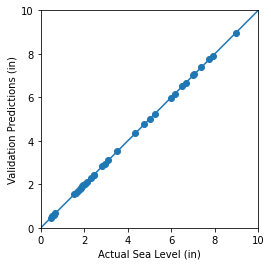

In [ ]:
plt.axes(aspect='equal')
plt.scatter(y_valid, validation_preds)
plt.xlabel('Actual Sea Level (in)')
plt.ylabel('Validation Predictions (in)')

limits = [0, 10]
plt.xlim(limits)
plt.ylim(limits)
plt.plot(limits, limits);